# **Analysis of Mob Lynching Cases in India**

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
df = pd.read_csv("MLData.csv")
print('Number of rows in the dataframe : ',len(df.index),'\n \n')
df.head(5)

Number of rows in the dataframe :  141 
 



,Name,Date,Location,State /UT,Death,Reason
0,Mohammad Akhlaq,28-09-2015,"Dadri, Uttar Pradesh",Uttar Pradesh,Yes,accusation for harming cow
1,Zahid Ahmad Bhat,09-10-2015,"Udhampur,Jammu",JammuAndKashmir(UT),Yes,accusation for harming cow
2,Noman,15-10-2015,"Sarahan,Himachal Pradesh",Himachal Pradesh,Yes,accusation for harming cow
3,Mohamaaed Hussain,13-01-2016,"Khirkiya,Madhya Pradesh",Madhya Pradesh,No,accusation for harming cow
4,Naseem Bano,13-01-2016,"Khirkiya,Madhya Pradesh",Madhya Pradesh,No,accusation for harming cow


# Data Preprocessing

In [164]:
# Removing Meaningless Rows
df.drop(df.index[[4,7,12,73]],inplace=True)
df.reset_index(drop=True,inplace=True)
print('Number of rows in the dataframe : ',len(df.index),'\n \n')

Number of rows in the dataframe :  137 
 



In [165]:
# Changing the Names of the coulumns:
df.columns = ['Victim\'s Name','Date','Location','State/UT','Died','Reason']
df.head(1)

,Victim's Name,Date,Location,State/UT,Died,Reason
0,Mohammad Akhlaq,28-09-2015,"Dadri, Uttar Pradesh",Uttar Pradesh,Yes,accusation for harming cow


In [166]:
# Adding Literacy Rate of a State column:
df['Literacy_Rate'] = df['State/UT']
def f(x):
  if x == 'Uttar Pradesh':
    return 69;
  elif x == 'Gujarat':
    return 79;
  elif x == 'Rajasthan':
    return 67;
  elif x == 'Jharkhand':
    return 67;
  elif x == 'West Bengal':
    return 77;
  elif x == 'Madhya Pradesh':
    return 70;
  elif x == 'Bihar':
    return 63;
  elif x == 'Assam':
    return 73;
  elif x == 'Maharashtra':
    return 82;
  elif x == 'JammuAndKashmir(UT)':
    return 68;
  elif x == 'Tripura':
    return 87;
  elif x == 'Haryana':
    return 76;
  elif x == 'Tamil Nadu':
    return 80;
  elif x == 'Karnataka':
    return 75;
  elif x == 'Andhra Pradesh':
    return 67;
  elif x == 'Delhi':
    return 86;
  elif x == 'Kerala':
    return 93;
  elif x == 'Himachal Pradesh':
    return 83;
  elif x == 'Chhattisgarh':
    return 71;
  elif x == 'Manipur':
    return 79;
  elif x == 'Telangana':
    return 66;
df['Literacy_Rate'] = df.Literacy_Rate.apply(f)

In [167]:
# Correcting Reason column:
def f(a):
  if a == 'accusation for harming cow':
    return 'Illegal Practice on Cow';
  elif a == 'Child-Lifter':
    return 'Child-Lifting';
  elif a == 'suspicious of Theft':
    return 'Theft'
  elif a == 'caste voilence ':
    return 'Caste Voilence on them';
  elif a == 'riot':
    return 'Riot';
  elif a == 'fight':
    return 'Heated argument turned into fight';
  elif a == 'braid chopper':
    return 'Braid Chopper';
  elif a == 'other cases':
    return 'Others';

df['Reason'] = df.Reason.apply(f)

In [168]:
# Checking Null Value Rows:
print('Number of rows in the dataframe : ',len(df.index),'\n \n')
df.isnull().sum()

Number of rows in the dataframe :  137 
 



Victim's Name    26
Date              0
Location          0
State/UT          1
Died              9
Reason            9
Literacy_Rate     1
dtype: int64

In [169]:
# Removing Meaningless columns:
df.drop(['Victim\'s Name','Location','Died'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
print('Number of rows in the dataframe : ',len(df.index),'\n \n')
print(df.isnull().sum())
df.head(5)

Number of rows in the dataframe :  137 
 

Date             0
State/UT         1
Reason           9
Literacy_Rate    1
dtype: int64


,Date,State/UT,Reason,Literacy_Rate
0,28-09-2015,Uttar Pradesh,Illegal Practice on Cow,69.0
1,09-10-2015,JammuAndKashmir(UT),Illegal Practice on Cow,68.0
2,15-10-2015,Himachal Pradesh,Illegal Practice on Cow,83.0
3,13-01-2016,Madhya Pradesh,Illegal Practice on Cow,70.0
4,31-01-2016,Kerala,Others,93.0


In [170]:
# To check the index of a row containing a Null Value
df[df['Literacy_Rate'].isnull()].index.tolist()

[59]

In [171]:
# Removing rows with NaN values:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
print('Number of rows in the dataframe : ',len(df.index),'\n \n')
print('Number of NaN in each column:\n',df.isnull().sum())
df.head()

Number of rows in the dataframe :  127 
 

Number of NaN in each column:
 Date             0
State/UT         0
Reason           0
Literacy_Rate    0
dtype: int64


,Date,State/UT,Reason,Literacy_Rate
0,28-09-2015,Uttar Pradesh,Illegal Practice on Cow,69.0
1,09-10-2015,JammuAndKashmir(UT),Illegal Practice on Cow,68.0
2,15-10-2015,Himachal Pradesh,Illegal Practice on Cow,83.0
3,13-01-2016,Madhya Pradesh,Illegal Practice on Cow,70.0
4,31-01-2016,Kerala,Others,93.0


In [172]:
# Frequency of mob lyncing cases in each States/UT :
Freq_Of_Cases_Each_State = df['State/UT'].value_counts()
Freq_Of_Cases_Each_State

Uttar Pradesh          19
Jharkhand              13
West Bengal            12
Rajasthan              12
Madhya Pradesh         11
Gujarat                 9
Bihar                   8
Maharashtra             7
Assam                   6
JammuAndKashmir(UT)     5
Tripura                 4
Haryana                 4
Tamil Nadu              4
Andhra Pradesh          3
Kerala                  2
Karnataka               2
Delhi                   2
Chhattisgarh            1
Manipur                 1
Himachal Pradesh        1
Telangana               1
Name: State/UT, dtype: int64

In [173]:
Freq = {'Uttar Pradesh': 19,
'Jharkhand': 13,
'West Bengal': 12,
'Rajasthan':12,
'Madhya Pradesh':11,
'Gujarat' : 9,
'Bihar':8,
'Maharashtra': 7,
'Assam':6,
'JammuAndKashmir(UT)': 5,
'Tripura': 4,
'Haryana': 4,
'Tamil Nadu':4,
'Andhra Pradesh':3,
'Karnataka': 2,
'Kerala' : 2,
'Delhi': 2,
'Chhattisgarh' : 1,
'Himachal Pradesh': 1,
'Manipur':1,
'Telangana': 1}

State_name = list(Freq.keys())
print('Name of States/UT :',State_name,'\n')

Values = list(Freq.values())
print('Freq_Of_Cases_Each_State : ',Values,'\n')


Name of States/UT : ['Uttar Pradesh', 'Jharkhand', 'West Bengal', 'Rajasthan', 'Madhya Pradesh', 'Gujarat', 'Bihar', 'Maharashtra', 'Assam', 'JammuAndKashmir(UT)', 'Tripura', 'Haryana', 'Tamil Nadu', 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Delhi', 'Chhattisgarh', 'Himachal Pradesh', 'Manipur', 'Telangana'] 

Freq_Of_Cases_Each_State :  [19, 13, 12, 12, 11, 9, 8, 7, 6, 5, 4, 4, 4, 3, 2, 2, 2, 1, 1, 1, 1] 



In [174]:
# Name of Top 5 State/UT with most frequent cases:
from heapq import nlargest
Top_5_names = nlargest(5, Freq , key = Freq.get) 
print('Top_5_names :',Top_5_names,'\n')

# Frequency Value of Top 5 State/UT with most frequent cases:
Top_5 = np.array(Values)
Top_5 = Top_5[:6]
print('Freq_Value_of_Top_5_names :',Top_5,'\n')


Top_5_names : ['Uttar Pradesh', 'Jharkhand', 'West Bengal', 'Rajasthan', 'Madhya Pradesh'] 

Freq_Value_of_Top_5_names : [19 13 12 12 11  9] 



## **Graph** **Plotting**


# Find out which State/UT has the highest mob lynching cases.

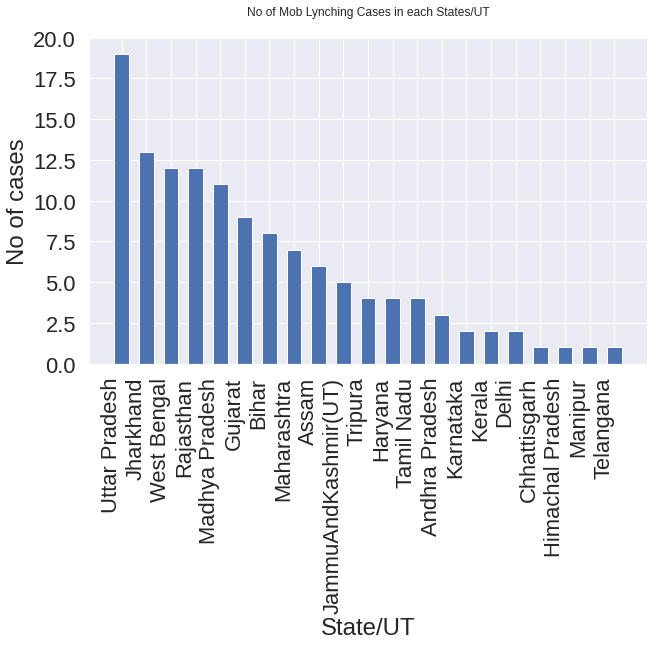

In [175]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(State_name, Values,align='center',width=0.6)
labels = ax.get_xticklabels()
plt.style.use('seaborn')
plt.setp(labels, rotation=90, horizontalalignment='right')
ax.set(ylim=[0,20], xlabel='State/UT', ylabel='No of cases', title='No of Mob Lynching Cases in each States/UT')
ax.title.set(y=1.05)

# Top 5 States with most mob Lynching cases


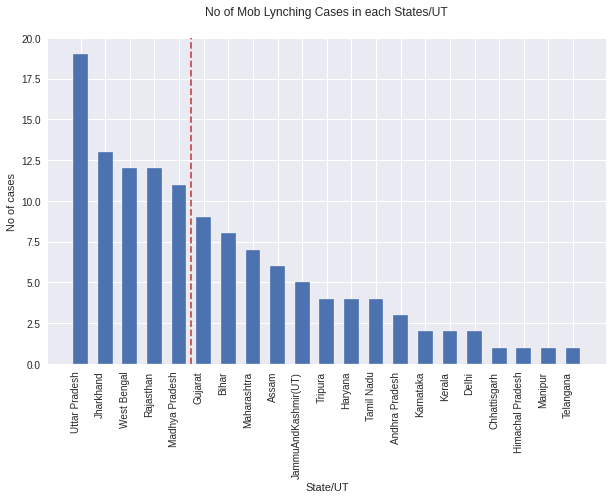

In [176]:
Top_5_names_index = Top_5_names.index(Top_5_names[4])

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(State_name, Values,align='center',width=0.6)
labels = ax.get_xticklabels()
#plt.xticks(rotation = 90)
plt.style.use('tableau-colorblind10')
plt.setp(labels, rotation=90, horizontalalignment='right')
ax.set(ylim=[0,20], xlabel='State/UT', ylabel='No of cases',
       title='No of Mob Lynching Cases in each States/UT')
ax.title.set(y=1.05)
ax.axvline(Top_5_names_index + 0.5, ls='--', color='r')

In [177]:
# Frequency of each reason in Reason Column:
Freq_Of_Each_Reason = df['Reason'].value_counts()
Freq_Of_Each_Reason

Illegal Practice on Cow              42
Child-Lifting                        29
Others                               25
Theft                                21
Riot                                  4
Braid Chopper                         3
Heated argument turned into fight     3
Name: Reason, dtype: int64

# This Function returns a graph which gives information about the Most common Reason of Mob Lynching in that state

In [178]:
# Removing rows where Reason is Others:
index_of_others = df[df.Reason == 'Others'].index
index_of_others

Int64Index([  4,   8,  16,  17,  28,  31,  47,  48,  49,  54,  56,  77,  86,
             87,  95,  98,  99, 105, 110, 112, 113, 115, 117, 118, 123],
           dtype='int64')

In [179]:
df.drop(df.index[index_of_others],inplace=True)
df.reset_index(drop=True,inplace=True)
print('Number of rows in the dataframe : ',len(df.index),'\n \n')
# Frequency of each reason in Reason Column:
Freq_Of_Each_Reason = df['Reason'].value_counts()
Freq_Of_Each_Reason

Number of rows in the dataframe :  102 
 



Illegal Practice on Cow              42
Child-Lifting                        29
Theft                                21
Riot                                  4
Braid Chopper                         3
Heated argument turned into fight     3
Name: Reason, dtype: int64

In [180]:
def plotting_graph(Name):
  State_Name = df[df['State/UT']== Name]
  ax = State_Name['Reason'].value_counts().plot(kind='bar',figsize=(8,9),title="Most Common Reason")
  ax.set_xlabel("Reason")
  ax.set_ylabel("No of Cases")

Type the Name of a State : Uttar Pradesh


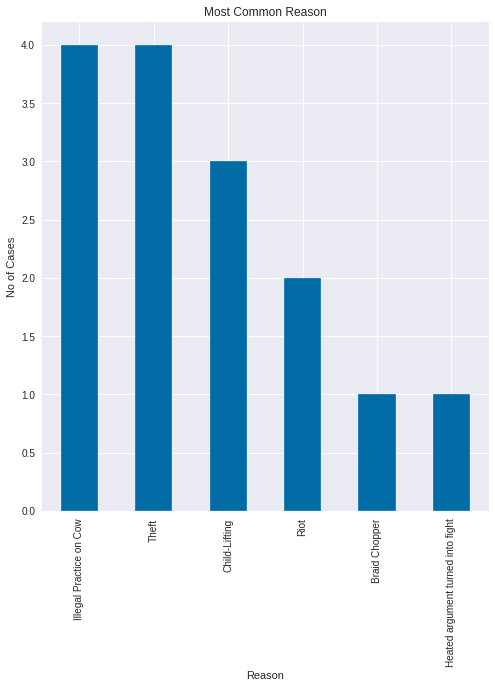

In [181]:
Name = input('Type the Name of a State : ')
plotting_graph(Name)

 # All states and their most common reason for mob lynching.

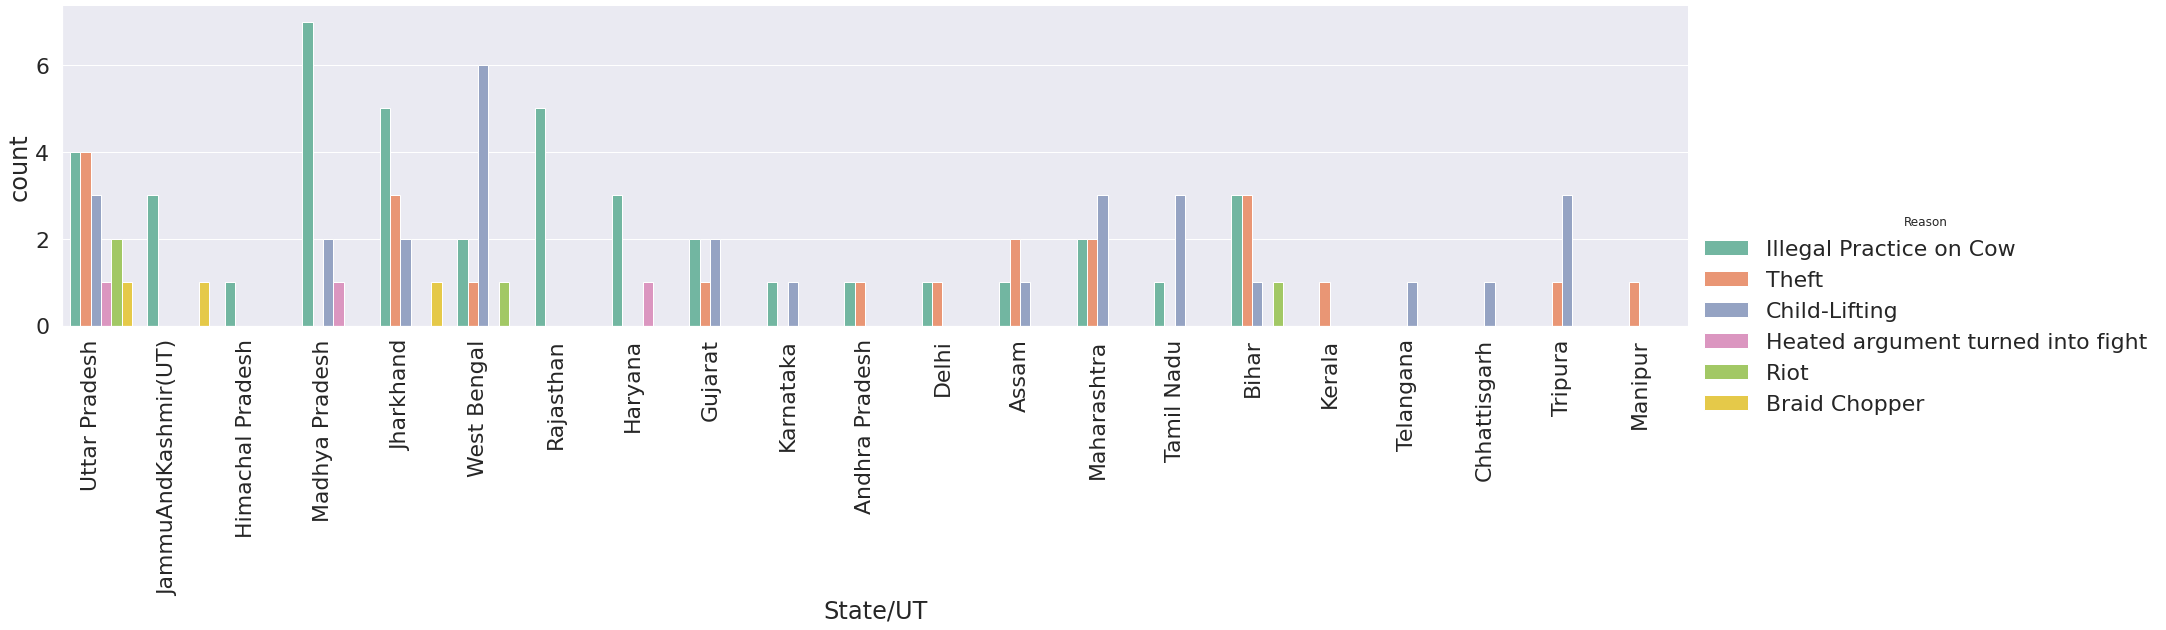

In [185]:
import seaborn as sns
Graph = sns.catplot('State/UT',kind='count',hue="Reason",data=df,aspect=4,height=6,palette='Set2')
Graph.set_xticklabels(rotation=90, horizontalalignment='right')
sns.set(font_scale=3)


In [183]:
df.to_csv("myfile.csv")